In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
import phik
import math
import csv
import pandas as pd
import time
import random
import heapq
from collections import Counter


In [3]:
df=pd.read_csv('cleaned_data.csv')

In [4]:
# Function to preprocess the data
def preprocess(train_data, test_data):
    preprocessed_train_data = train_data
    preprocessed_test_data = test_data
    return preprocessed_train_data, preprocessed_test_data

# Function to read data from a CSV file
def read_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = list(reader)
    return data

# Function to retrieve similar cases from the case base
def retrieve_similar_cases(new_case, case_base):
    similarity_scores = {}
    for case in case_base:
        similarity_score = compute_global_similarity(new_case, case)
        similarity_scores[case['CaseId']] = similarity_score
    # Sorting the similarity scores in descending order
    similar_cases = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    return similar_cases

# Function to compute the global similarity between a new case and a case in the case base
def compute_global_similarity(new_case, case):
    similarity_sum = 0
    new_case_attributes = new_case
    case_attributes = case
    # Calculating Jaccard similarity for each attribute
    for attribute, value_set in new_case_attributes.items():
        if attribute in case_attributes:
            case_value_set = case_attributes[attribute]
            similarity_score = compute_jaccard_similarity(value_set, case_value_set)
            similarity_sum += similarity_score
    # Computing average similarity
    average_similarity = similarity_sum / len(new_case_attributes)
    return average_similarity

# Function to compute Jaccard similarity between two sets
def compute_jaccard_similarity(set_A, set_B):
    intersection = len(set(set_A).intersection(set_B))
    union = len(set(set_A).union(set_B))
    similarity_score = intersection / union if union != 0 else 0
    return similarity_score



In [25]:
def reuse(new_case, preprocessed_train_data):
    top_similar_cases = {}
    for given in new_case:
        case_id = given['CaseId']
        similar = retrieve_similar_cases(given, preprocessed_train_data)
        
        # Retrieve top 3 similar cases based on similarity scores
        top_similar_cases[case_id] = sorted(similar, key=lambda x: x[1], reverse=True)[:10]
        
    top_obs = {}
    for key, value in top_similar_cases.items():
        top_ids = [x[0] for x in value]
        ta = [preprocessed_train_data[id]['Growing_Stress'] for id in range(len(preprocessed_train_data)) if preprocessed_train_data[id]['CaseId'] in top_ids]
        top_obs[key] = ta
    
    return top_obs



In [26]:
def revise(reuse_res):
    a = {}
    for key, value in reuse_res.items():
        a[key]=Counter(value).most_common(1)[0][0]
        
    return list(a.values())

In [27]:
def accuracy_cal(predicted, actual):
    pred = np.zeros(len(predicted))
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            pred[i] = 1
        else:
            pred[i] = 0
    return np.mean(pred)

In [ ]:
def retain (new_case, preprocessed_train_data):
    wrong_predicted={}
    for key, value in new_case.items():
        if new_Acase[id]['Growing_Stress'] for id in range(len(new_case))= a.values():
            preprocessed_train_data.append(new_case)
        else:
            wrong_predicted[id]= new_case

    return preprocessed_train_data,  wrong_predicted

In [28]:
def main(data, test_set):
    train_data, test_data = train_test_split(data, test_size=test_set, random_state=45)
    preprocessed_train_data, preprocessed_test_data = preprocess(train_data, test_data)
    res = reuse(preprocessed_test_data, preprocessed_train_data )
    w=revise(res)
    
    actual = [preprocessed_test_data[id]['Growing_Stress'] for id in range(len(preprocessed_test_data))]
    accuracy=accuracy_cal(w, actual)
    
    return preprocessed_train_data, preprocessed_test_data, res,actual,w,accuracy
    

In [41]:
filename = 'clearn_data.csv'
data = read_csv(filename)
test_set= 0.2
preprocessed_train_data, preprocessed_test_data, res, w, actual,accuracy  = main(data, test_set)


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [43]:
accuracy = accuracy_score(actual, w)

pred = precision_score(actual, w, average ='macro')
recall = recall_score(actual,w, average='macro')
f1= f1_score(actual,w, average='macro')

print ("Accuracy:", accuracy)
print("Precision:", pred)
print("Recall:", recall)
print("F1_score:", f1)

Accuracy: 0.9818181818181818
Precision: 0.9767331433998101
Recall: 0.9866666666666667
F1_score: 0.9813100842894954


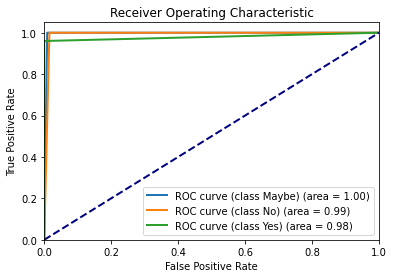

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
actual_encoded = label_encoder.fit_transform(actual)
predicted_encoded = label_encoder.transform(w)

# Get the list of unique classes
class_names = label_encoder.classes_

# Binarize the actual labels and predicted labels
actual_binarized = label_binarize(actual_encoded, classes=np.arange(len(class_names)))
predicted_binarized = label_binarize(predicted_encoded, classes=np.arange(len(class_names)))

# Plot ROC curve for each class
plt.figure()
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(actual_binarized[:, i], predicted_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (class {class_names[i]}) (area = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
